#### Cesar Alonso Lopez Anguiano

#### Import libraries

In [8]:
# Importación de librerías
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report, confusion_matrix


In [9]:
# Cargar dataset desde archivo CSV
df = pd.read_csv("iris.csv")

In [10]:
# Mostrar primeras filas
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


### EDA

In [11]:
# Información general
df.info()

# Estadísticas descriptivas
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


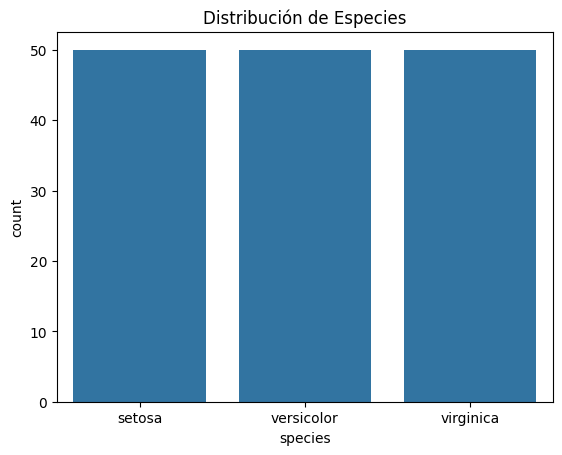

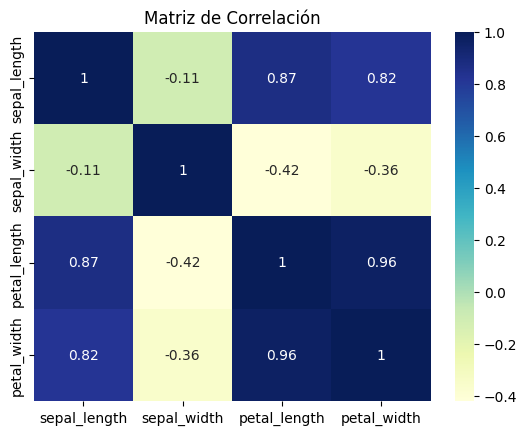

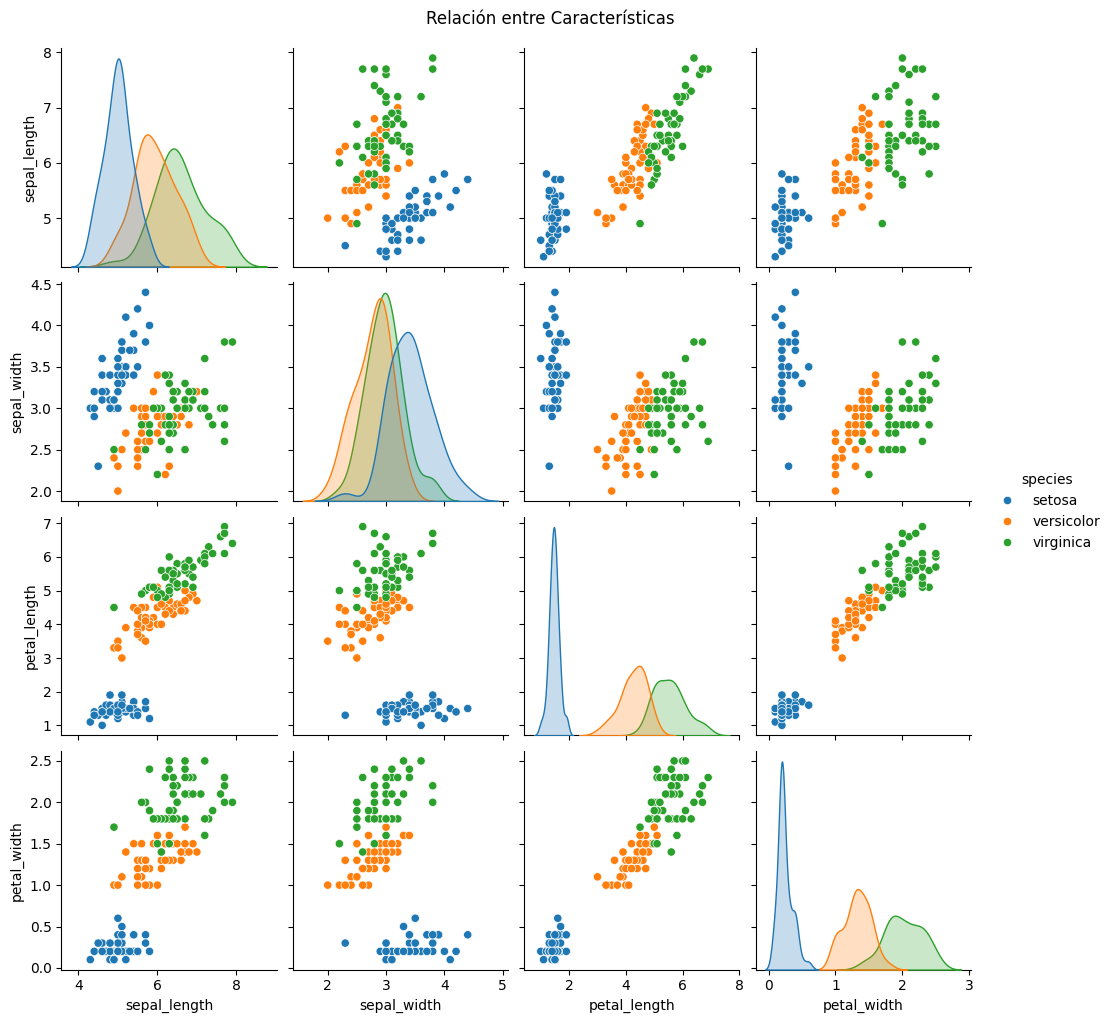

In [12]:
# Distribución de especies
sns.countplot(data=df, x='species')
plt.title("Distribución de Especies")
plt.show()

# Matriz de correlación
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap="YlGnBu")
plt.title("Matriz de Correlación")
plt.show()

# Pairplot para visualización
sns.pairplot(df, hue='species')
plt.suptitle("Relación entre Características", y=1.02)
plt.show()

In [13]:
# Separar variables predictoras y objetivo
X = df.drop('species', axis=1)
y = df['species']

# Codificar variable objetivo
le = LabelEncoder()
y_encoded = le.fit_transform(y)

# División train-test
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.3, random_state=42, stratify=y_encoded)


=== Decision Tree (Sin tuning) ===
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        15
  versicolor       1.00      0.80      0.89        15
   virginica       0.83      1.00      0.91        15

    accuracy                           0.93        45
   macro avg       0.94      0.93      0.93        45
weighted avg       0.94      0.93      0.93        45



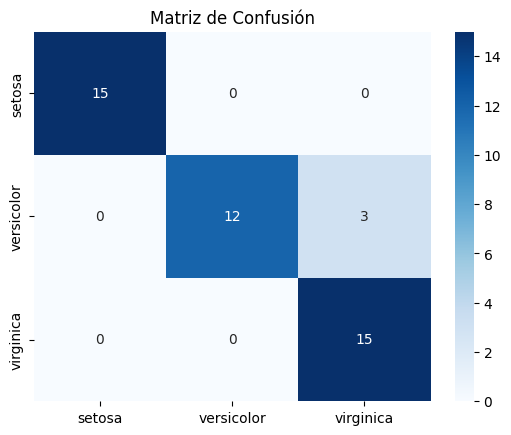

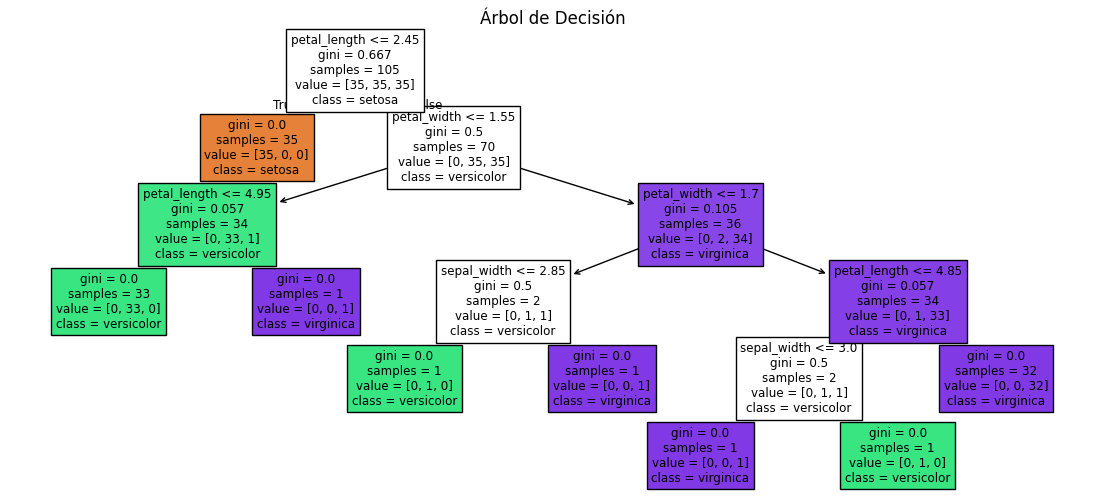

In [14]:
# Entrenar modelo básico
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)

# Predicción y evaluación
y_pred = dt_model.predict(X_test)

print("=== Decision Tree (Sin tuning) ===")
print(classification_report(y_test, y_pred, target_names=le.classes_))

sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues', xticklabels=le.classes_, yticklabels=le.classes_)
plt.title("Matriz de Confusión")
plt.show()

# Visualización del árbol
plt.figure(figsize=(14, 6))
plot_tree(dt_model, filled=True, feature_names=X.columns, class_names=le.classes_)
plt.title("Árbol de Decisión")
plt.show()


=== Decision Tree (Con GridSearchCV) ===
Mejores parámetros: {'criterion': 'gini', 'max_depth': 3, 'min_samples_split': 2}
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        15
  versicolor       1.00      0.93      0.97        15
   virginica       0.94      1.00      0.97        15

    accuracy                           0.98        45
   macro avg       0.98      0.98      0.98        45
weighted avg       0.98      0.98      0.98        45



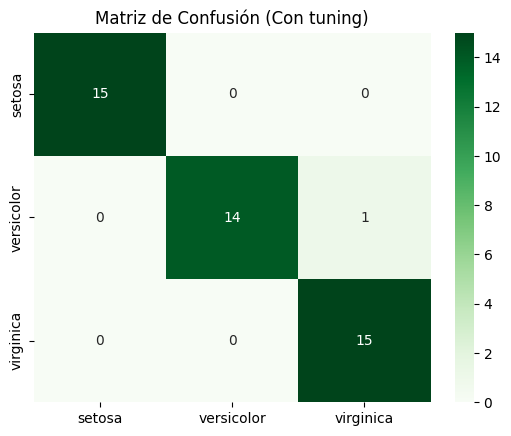

In [15]:
# Definición de la malla de parámetros
param_grid = {
    'max_depth': [2, 3, 4, 5, None],
    'min_samples_split': [2, 3, 4],
    'criterion': ['gini', 'entropy']
}

# Grid Search con validación cruzada
grid = GridSearchCV(DecisionTreeClassifier(random_state=42), param_grid, cv=5)
grid.fit(X_train, y_train)

# Mejor modelo
best_model = grid.best_estimator_
y_pred_tuned = best_model.predict(X_test)

print("=== Decision Tree (Con GridSearchCV) ===")
print(f"Mejores parámetros: {grid.best_params_}")
print(classification_report(y_test, y_pred_tuned, target_names=le.classes_))

sns.heatmap(confusion_matrix(y_test, y_pred_tuned), annot=True, fmt='d', cmap='Greens', xticklabels=le.classes_, yticklabels=le.classes_)
plt.title("Matriz de Confusión (Con tuning)")
plt.show()


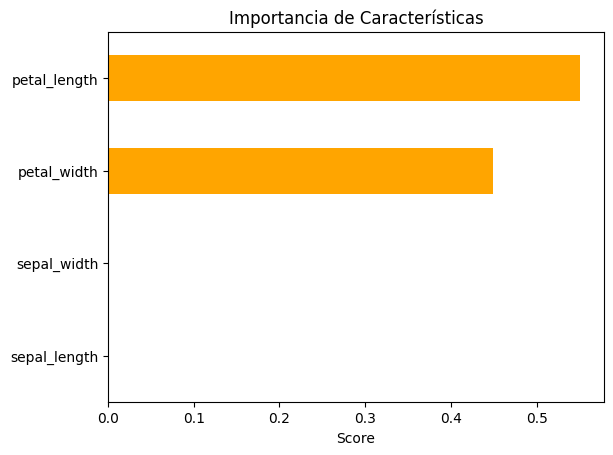

In [16]:
# Importancia de cada variable
importances = pd.Series(best_model.feature_importances_, index=X.columns)
importances.sort_values().plot(kind='barh', color='orange')
plt.title("Importancia de Características")
plt.xlabel("Score")
plt.show()
